In [272]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


Этот датасет демонстрирует количество самоубийств совершенных в разных странных с 1985 по 2016 год.

Колонки:

**country** - страна <br>
**year** - год<br>
**sex** - пол<br>
**age** - возраст<br>
**suicides_no** - количество самоубийств<br>
**population** - население<br>
**suicides/100k pop** - количество самоубийств на 100 тысяц населения<br>
**country-year** - Соответсвие страна-год<br>
**HDI for year** - Индекс человеческого развития<br>
**gdp_for_year** - ВВП за год<br>
**gdp_per_capita** - ВВП на душу населения <br>
**generation** - Поколение<br>

Хочу отдельно рассмотреть Россию и предсказать количество на следующие года после 2016.

In [273]:
df = pd.read_csv("data.csv")

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [274]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

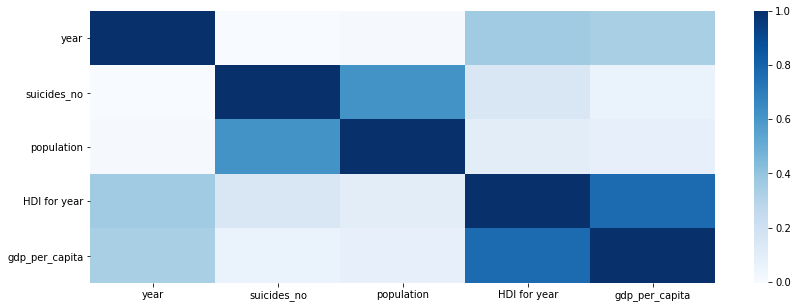

In [275]:
cols = ['year','suicides_no', 'population',
         'HDI for year', ' gdp_for_year',
       'gdp_per_capita']
fig = plt.figure(figsize= (14,5))
sns.heatmap(df[cols].corr(), cmap = 'Blues')

<br>Можно заметить, что количество суицидов зависит от населения(что не удивительно) и немного от HDI, что логично

Сразу уберем некоторые признаки, которые не дадут нам много информации
и переименуем некоторые столбцы:<br>

In [276]:
df = df.drop(['sex', 'age', ' gdp_for_year', 'generation'], axis = 1)
df = df.rename(columns = {'suicides/100k pop' : 'q/100k_p',
                          'suicides_no': 'n_suicides',
                         'HDI for year': 'HDI'})
df.head()

,country,year,n_suicides,population,q/100k_p,country-year,HDI,gdp_per_capita
0,Albania,1987,21,312900,6.71,Albania1987,NaN,796
1,Albania,1987,16,308000,5.19,Albania1987,NaN,796
2,Albania,1987,14,289700,4.83,Albania1987,NaN,796
3,Albania,1987,1,21800,4.59,Albania1987,NaN,796
4,Albania,1987,9,274300,3.28,Albania1987,NaN,796


<br>Теперь отдельно рассмотрим Российскую Федерацию, и для нее будем предсказывать количество суицидов.



In [277]:
Russia_data = df[df['country'] == 'Russian Federation']
Russia_data.head()

,country,year,n_suicides,population,q/100k_p,country-year,HDI,gdp_per_capita
20936,Russian Federation,1989,1393,1349100,103.25,Russian Federation1989,NaN,3740
20937,Russian Federation,1989,12030,18058500,66.62,Russian Federation1989,NaN,3740
20938,Russian Federation,1989,6250,9383700,66.60,Russian Federation1989,NaN,3740
20939,Russian Federation,1989,6856,12748800,53.78,Russian Federation1989,NaN,3740
20940,Russian Federation,1989,1677,4738100,35.39,Russian Federation1989,NaN,3740


<br>Выдвинем гипотезу, что до 2003 года было больше самоубийств, чем после и проверим ее с помощью критерия Манна-Уитни:

In [278]:
stats.mannwhitneyu(Russia_data[Russia_data['year'] >= 2003]['n_suicides'],
                   Russia_data[Russia_data['year'] < 2003]['n_suicides'], alternative = 'greater')

MannwhitneyuResult(statistic=11582.0, pvalue=0.9646292375048077)

<br>Да, можно заметить, что нулевая гипотеза подтверждается - до 2003 было больше самоубийств, чем после. Это объясняется тяжелыми 90ыми для нашей страны.

<br>Рассмотрим количество суицидов в зависимости от года, для этого сгрупируем по годам.


In [279]:
Russia = Russia_data.groupby(by='year')['n_suicides', 'population'].sum()
Russia['percent'] = Russia.n_suicides * 100 / Russia.population
Russia.head()

,n_suicides,population,percent
year,,,
1989,37921,135443800,0.027998
1990,39028,136398200,0.028613
1991,39281,137283000,0.028613
1992,45923,138118900,0.033249
1993,55846,137692800,0.040558


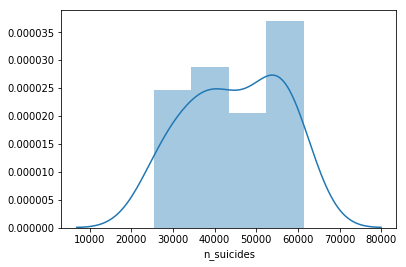

In [281]:
sns.distplot(Russia.n_suicides)

<br> Посмотрим зависимость количества самоуйств от года:

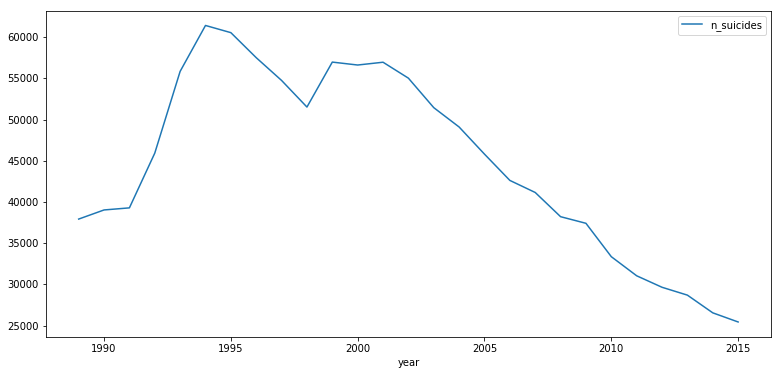

In [282]:
Russia.plot(y='n_suicides', figsize=(13,6))

<br>Проверим с помощью критерия Шапиро-Уилка как распределены наши данные

In [283]:
st, pvalue = stats.shapiro(Russia.n_suicides)
print('pvalue = ', pvalue)

pvalue =  0.0866393968462944


Можем подтвердить нулевую гиппотезу о нормальности распределения данных

In [284]:
test_ = sm.tsa.adfuller(Russia['n_suicides'])
print ('adf: ', test_[0] )
print ('p-value: ', test_[1])
print('Critical values: ', test_[4])
if test_[0]> test_[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -4.14780614195142
p-value:  0.0008065514835718939
Critical values:  {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}
единичных корней нет, ряд стационарен


<br>Так как ряд стационарен, и в наших данных за последние несколько лет явно присутвует линейный тренд, попробуем применить модель Хольта

In [285]:
from statsmodels.tsa.holtwinters import Holt

In [286]:
train = Russia[:20]
test = Russia[19:28]
y_hat = test.copy()

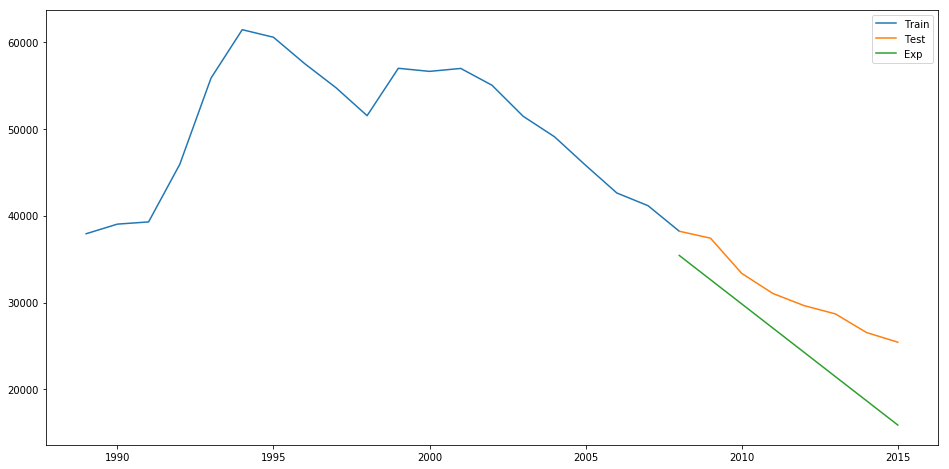

In [287]:
fit = Holt(np.asarray(train.n_suicides)).fit()
y_hat['n_suicides'] = fit.forecast(len(y_hat))

fig = plt.figure(figsize=(16,8))
plt.plot(train['n_suicides'],  label='Train')
plt.plot(test['n_suicides'], label='Test')
plt.plot(y_hat['n_suicides'], label='Exp')
plt.legend()

<br>Прямая предсказания оказалась чуть ниже ожидаемого уровня, поэтому попробуем поднять ее "руками" на некоторую величину:

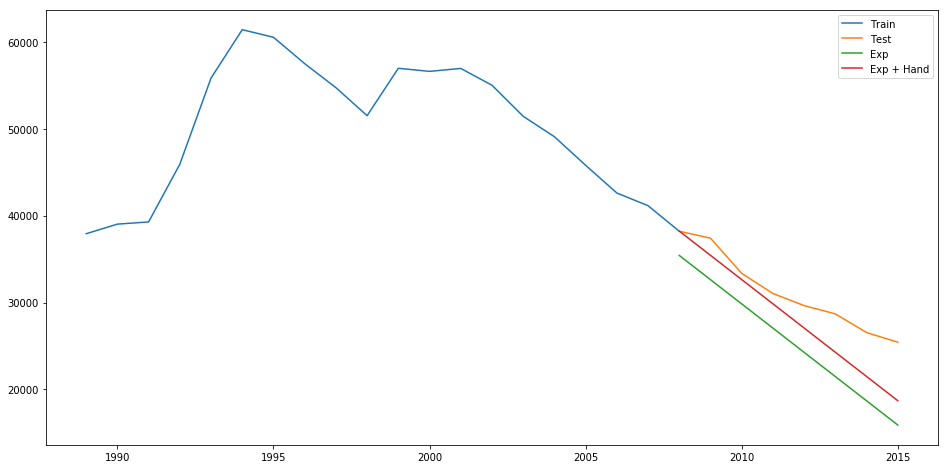

In [288]:
fig = plt.figure(figsize=(16,8))
plt.plot(train['n_suicides'],  label='Train')
plt.plot(test['n_suicides'], label='Test')
plt.plot(y_hat['n_suicides'], label='Exp')
plt.plot(y_hat['n_suicides'] + 2800, label='Exp + Hand')
plt.legend()

<br>Вот такое предсказание уже вполне похоже на правду. Исходя из него, можно сделать вывод, что количество самоубийств будет продолжать уменьшаться.
<br>
Так же было проверено, что до 2003 года суициды происходили чаще, что можно объяснить более низким качеством жизни в 90ые года в нашей стране.
<br>
Ну и можно заметить,что ряд стационарен и что в последние года явно заметен линейный тренд понижения количества самоуйбиств.